# Batch Reactors 01

This Notebook works through a textbook analysis of data obtained over heterogeneous catalysts using a batch reactor. Data presented here are simulated experimental data that are intended to highlight specific features of reactions catalyzed by solids that appear commonly in peer-reviewed literature and may obscure fundamental insights.

Here, we consider a hypotehtical reaction occuring on Pt nanoparticles that are dispersed on various high surface area supports.  We begin by examining data that are typical of those obtained using batch reactors in catalysis laboratories.

In [1]:
###############################################################
# This block loads the various packages used in this notebook #
###############################################################

using DelimitedFiles #read and write to .csv files 
using Printf         #formatted f strings for printing
using Polynomials    #package features basic linear regression tools (among other things)
using CairoMakie     #package for generating publication-quality figures
using LaTeXStrings   #this package provides support for LaTeX syntax in strings; useful for formatting
using JLD2           #saves and loads julia data structures
using DataFrames     #create data frames
using PrettyTables   #this package provides nice tabular formatting for display in notebook

In [2]:
#######################################################################################
# This is activating CairoMakie and setting the default screen display to .svg format #
#######################################################################################

CairoMakie.activate!(type = "svg")

In [3]:
#################################################################
#  Set of 4 Figure Themes for Makie/CairoMakie                  #
#################################################################

#################################################################
#  Defaults for linear axes x,y plots                           #
#################################################################

theme_linear = Theme(    
    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),
    
    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = false,
        xminorgridvisible  = false,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = false,
        yminorgridvisible  = false,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log-log axes x,y plots                          #
#################################################################

theme_log = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log x/linear y plots                            #
#################################################################

theme_logx = Theme(    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for linear x/log y plots                            #
#################################################################

theme_logy = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)
;

## Example 01

We will consider data obtained in a batch reactor for the following gas-phase reaction that occurs on a 3.0 wt% $\mathrm{Pt/SiO_2}$ catalyst:

$$A \longrightarrow B$$

We pick this system specifically because it is superficially simple. It is comprised of a single, irreversible reaction that involves only two species and occurs on a single catalyst. At this point in our research, ***we know nothing of apparent kinetic trends or macroscale rate laws, let alone a mechanism or rate determining step***. This prompts our analysis, and we are basically doing exploratory kinetic research. For our experiment, we charge our batch reactor with catalyst and reactant with the quantities given below. Importantly, 

1. We confirm that the reactor operates isothermally (constant T) and isobarically (constant P)
2. That the density and Volume of the system are constant;
3. That the reactor contents are perfectly mixed.

Samples are withdrawn periodically, and we analyze them with gas-chromatography. As is common practice, we use our GC data to determine the concentration of reactant and product as a function of reaction time. We collect the data, store it in a spreadsheet, and save it as a .csv file that can be loaded into this notebook for analysis.   

**Experimental Conditions**

\begin{align}
    T       &= 450.0 \ \mathrm{K} \\
    C_{A0}  &= 0.0267 \ \mathrm{moles \ L^{-1}}\\
    C_{B0}  &= 0 \ \mathrm{moles \ L^{-1}} \\
    m_{c}   &= 1.0 \, \mathrm{g} \\
\end{align}


In [4]:
#####################################################################################
# Define reaction conditions, constants, and relevant parameters                    #
#####################################################################################

T   = 450.0     #K
P   = 1.0       #bar
R   = 0.08314   #L*bar/mol/K
CA0 = P/R/T     #moles/L
CB0 = 0.0       #moles/L
@printf("CA0 = %0.4f mol/L", CA0)
;

CA0 = 0.0267 mol/L

In [6]:
####################################################################################
# Import batch reactor data saved in a .csv file                                   #
####################################################################################

DATA1, HEADER = readdlm("BATCH1.csv", ',', Any, '\n', header = true)
DATA1 = Float64.(DATA1)
t1    = DATA1[:, 1] #batch reaction time in seconds
CA1   = DATA1[:, 4] #concentration of A, mol/L
CB1   = DATA1[:, 5] #concentraiton of B, mol/L
XA1   = (CA0 .- CA1)/CA0 #Adequate definition of XA for a CV Batch Reactor

####################################################################################
# Generate a nicely formatted table; using for display purposes and not analysis   # 
####################################################################################

pretty_table(hcat(t1/1000, round.(CA1*1000, digits = 1), round.(CB1*1000, digits = 1), round.(XA1, digits = 2)), header = (["t (ks)", "CA (mmol/L)", "CB (mmol/L)", "XA"]))
;

┌────────┬─────────────┬─────────────┬──────┐
│ t (ks) │ CA (mmol/L) │ CB (mmol/L) │   XA │
├────────┼─────────────┼─────────────┼──────┤
│    0.0 │        26.7 │         0.0 │  0.0 │
│   0.15 │        24.5 │         1.1 │ 0.08 │
│    0.3 │        23.7 │         2.2 │ 0.11 │
│    0.6 │        23.0 │         4.2 │ 0.14 │
│    0.9 │        20.7 │         5.7 │ 0.23 │
│    1.2 │        18.7 │         7.5 │  0.3 │
│    1.5 │        18.2 │         9.1 │ 0.32 │
│    1.8 │        16.0 │        10.0 │  0.4 │
│    2.1 │        13.7 │        11.8 │ 0.49 │
│    2.5 │        13.5 │        13.0 │  0.5 │
│    3.0 │        11.4 │        15.4 │ 0.57 │
│    3.5 │         9.8 │        16.5 │ 0.63 │
│    4.0 │         8.8 │        18.3 │ 0.67 │
│    4.5 │         7.2 │        19.3 │ 0.73 │
│    5.3 │         5.9 │        20.5 │ 0.78 │
│    6.0 │         4.8 │        21.8 │ 0.82 │
│    7.0 │         3.6 │        23.1 │ 0.87 │
│    8.0 │         2.9 │        23.3 │ 0.89 │
│    9.0 │         2.1 │        24

In [7]:
########################################################################################
# Plotting CA/ vs. time profile                                                        #
########################################################################################

set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (0, 30)
ytick_vals = collect(0:5:30)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{C_A (mmol \, L^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t1/1000, CA1*1000, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1.25, strokecolor = :blue, color = (:white, 0.0))
axislegend(ax1, position = :rt, framevisible = true)

########################################################################################
# Plotting XA/ vs. time profile                                                        #
########################################################################################

figx = Figure(size = (600, 600))
ax1  = Axis(figx[1,1])
ax2  = Axis(figx[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (0, 1)
ytick_vals = collect(0:0.2:1)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{X_A}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t1/1000, XA1, label = "Pt/SiO₂", marker = :utriangle, markersize = 15, strokewidth = 1.25, strokecolor = :black, color = (:white, 0.0))
axislegend(ax1, position = :rb, framevisible = true)
;

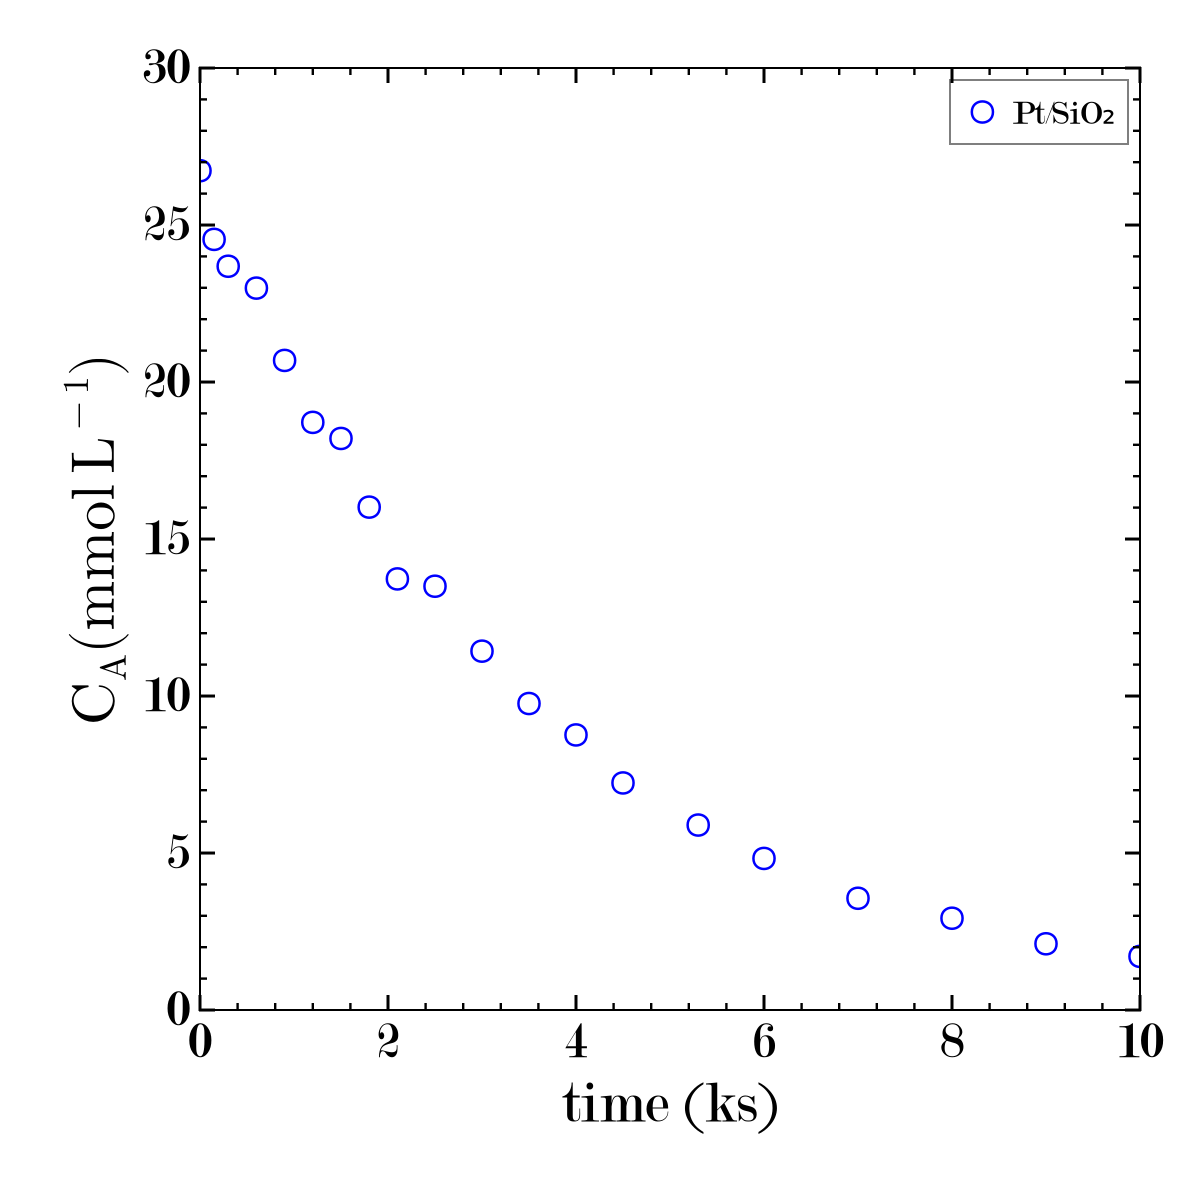

In [8]:
display(fig1)
;

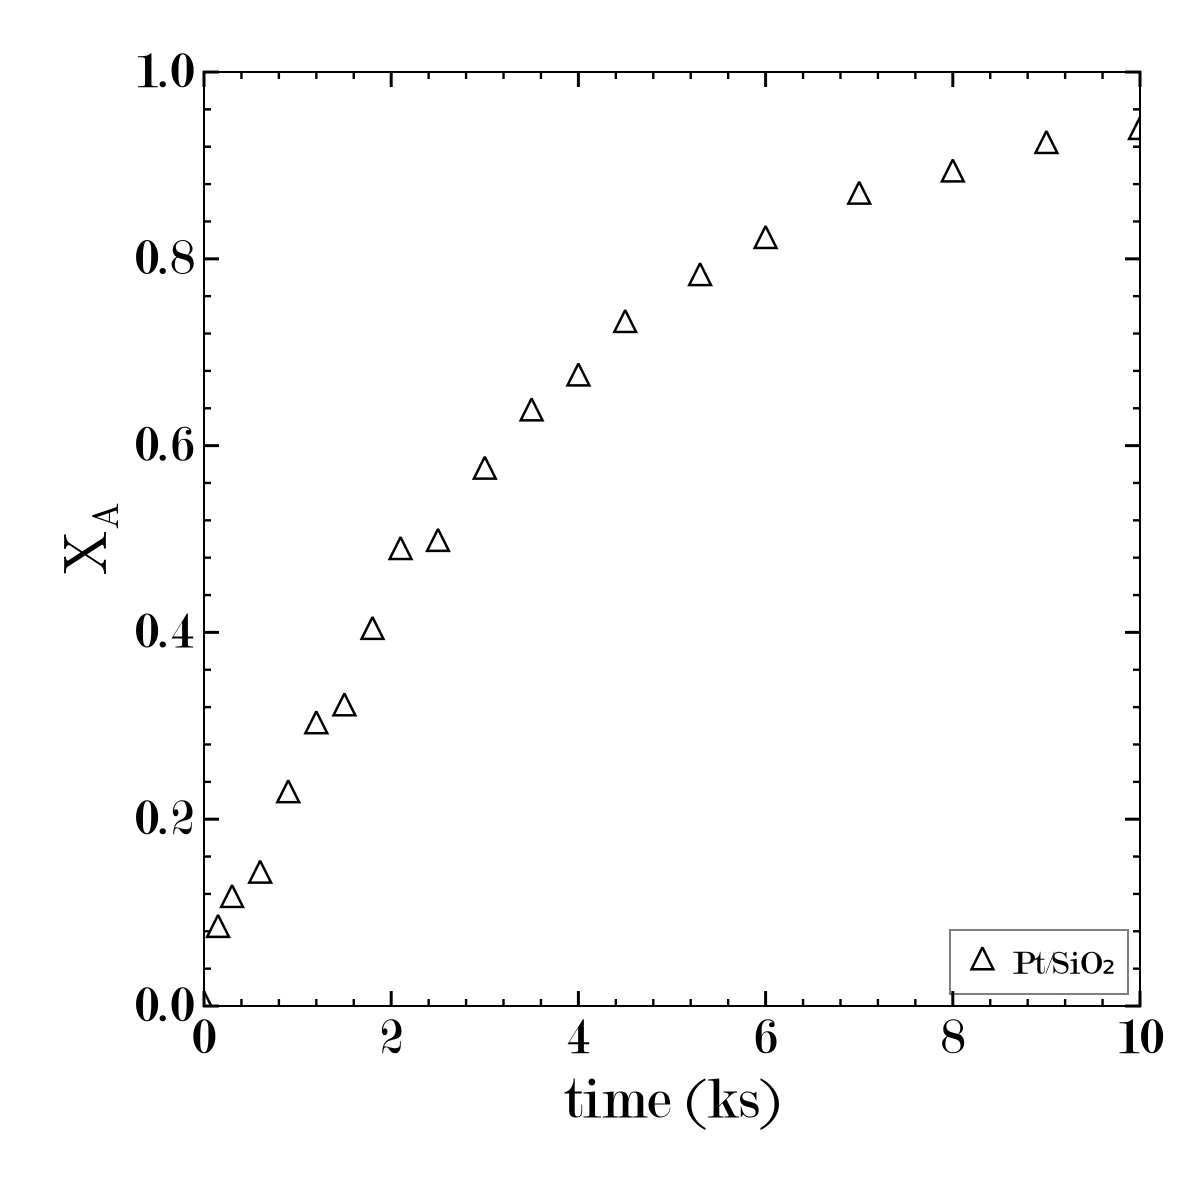

In [8]:
display(figx);

## Analysis of Data obtained in a Batch Reactor

Here, we will start the analysis as is typically presented in most undergraduate textbooks. Quite often, one sees similar analyses in peer-reviewed literature as well. It is very likely that our training would generally prompt us to approach the analysis in either or both of two ways: relatively macroscopic ***differential analysis*** or ***integral analysis***. It is less likely that we would attempt a more sophisticated ***microkinetic*** analysis at this point as we know very little about the reaction mechanims.

Despite the different names, these methods both essentially refer to the material balance on a batch reactor. The difference between them is how we analyze the material balance. To use them, we should really first write an appropriate material balance for our batch reactor. For the moment, we will choose the one that usually sticks in most people's memories from courses in physical chemistry and reaction engineering, which is that of a constant volume, perfectly-mixed batch reactor.  Presently, I see no reason why I couldn't apply this balance since the experiment was performed in an autoclave reactor of fixed volume, and we have stated that data are obtained under conditions of kinetic control and perfect mixing. We will use the notation from Scott Fogler's *Elements of Chemical Reaction Engineering* as this is one that most of us are going to be familiar with.

$$\frac{dC_A}{dt} = R_A$$

This balance simply states that, in a perfectly mixed, constant volume batch reactor, the rate of change in the concentration of species A is equal to the intensive rate of production of species A per unit volume. To move the analysis further, we need to define the intensive production rate of species A, $R_A$ as a function of reaction rate. We do this by invoking information about reaction stoichiometry, i.e., each time the reaction occurs, it consumes one molecular or molar equivalent of species A, and it produces one equivalent of species B.  Thus, $R_A = -1r$:

$$\frac{dC_A}{dt} = -r$$

When we know nothing about reaction kinetics, we have a dilemma in that we don't know a rate law that would allow us to express reaction rate as a function of the state variables of time and CA. In the absence of mechanistic insights, we would probably propose power law kinetics, which says that the rate of reaction scales with temperature (k) and species concentration raised to an unknown power, $\alpha$, i.e., the reaction order in species A:

$$\frac{dC_A}{dt} = -k{C_A}^\alpha$$

Now we should decide whether we want to proceed with a differential or integral analysis of the data. Both have merits and disadvantages. If we do not know a reaction order, then differential analysis is convenient as it permits us to easily estimate the reaction order. The downside is that differentiation of discrete, noisy data will amplify experimental imprecision. If we do know a reaction order, then the integral analysis generally permits a more precise estimation of kinetic parameters (e.g., a rate constant).

### A differential analysis of data

Since we don't have any information about the rate law, let's try a differential analysis. To move forward, we approximate the derivative in the material balance using finite differences:

$$\frac{dC_A}{dt} \approx \frac{\Delta C_A}{\Delta t}$$

From our material balance, we then conclude that:

$$r \approx -\frac{\Delta C_A}{\Delta t}$$

Ultimately, this analysis provides us with a discrete set of estimated, intensive rates of reaction at multiple values of $C_A$, i.e., differential analysis of batch reactor data transforms raw $C_A$ vs. $t$ profiles into $r$ vs $C_A$ data:

In [9]:
########################################################################################################
# Estimate reaction rates using a forward difference formula                                           #
########################################################################################################

dt1 = diff(t1)
dC1 = diff(CA1)
r1  = -1*dC1./dt1
pretty_table(hcat(round.(CA1[1:end-1]*1000, digits = 2), round.(r1*1e6, sigdigits = 3)), header = (["CA (mmmol/L)", "r (mmol/L/ks)"]))

┌──────────────┬───────────────┐
│ CA (mmmol/L) │ r (mmol/L/ks) │
├──────────────┼───────────────┤
│        26.73 │          14.6 │
│        24.54 │           5.7 │
│        23.69 │          2.32 │
│        22.99 │          7.68 │
│        20.69 │          6.58 │
│        18.71 │          1.71 │
│         18.2 │          7.29 │
│        16.02 │          7.62 │
│        13.73 │         0.583 │
│         13.5 │          4.14 │
│        11.43 │          3.34 │
│         9.76 │           2.0 │
│         8.76 │          3.06 │
│         7.23 │          1.68 │
│         5.89 │          1.52 │
│         4.83 │          1.27 │
│         3.56 │         0.636 │
│         2.92 │         0.814 │
│         2.11 │         0.401 │
└──────────────┴───────────────┘


### Linearization and parameter estimation

With estimates of the reaction rate in hand, we can return to the power law kinetic model:

$$r = k{C_A}^\alpha$$

The model can be linearized by taking logarithms:

$$\log_{10}{(r)} = \log_{10}{(k)} + \alpha \log_{10}{(C_A)}$$

This permits straightforward estimation of the reaction order and rate constant via linear regression. 

In [11]:
########################################################################################################
# Linear regression to estimate slope (α) and intercept (log10(k))                                     #
########################################################################################################

Y1  = log10.(r1)
X1  = log10.(CA1[1:end-1])
f1  = fit(X1, Y1, 1)
;

In [12]:
##############################################################################################
# This cell generates log-log plot of r vs. CA  for Pt/SiO2                                  #
##############################################################################################

set_theme!(theme_log)
fig2 = Figure(size = (600, 600))
ax1  = Axis(fig2[1,1])
ax2  = Axis(fig2[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (1e-4, 1e0)
#xtick_vals = [0.001, 0.01, 0.1]
ylim_vals  = (1e-7, 1e-4)
#ytick_vals = [0.01, 0.1, 1, 10, 100]
xscale_val = log10
yscale_val = log10

ax1.xlabel = L"\mathrm{C_A (mol/L)}"
ax1.ylabel = L"\mathrm{r \,(mol/L/s)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

scatter!(ax1, 10 .^X1, r1, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1.25, strokecolor = :blue, color = (:white, 0.0))
lines!(ax1, 10 .^X1, 10 .^f1.(X1), color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(ax1, position = :lt, framevisible = true)

CairoMakie.activate!(type = "svg")

α = 1.04, and k = 2.80E-04 s⁻¹

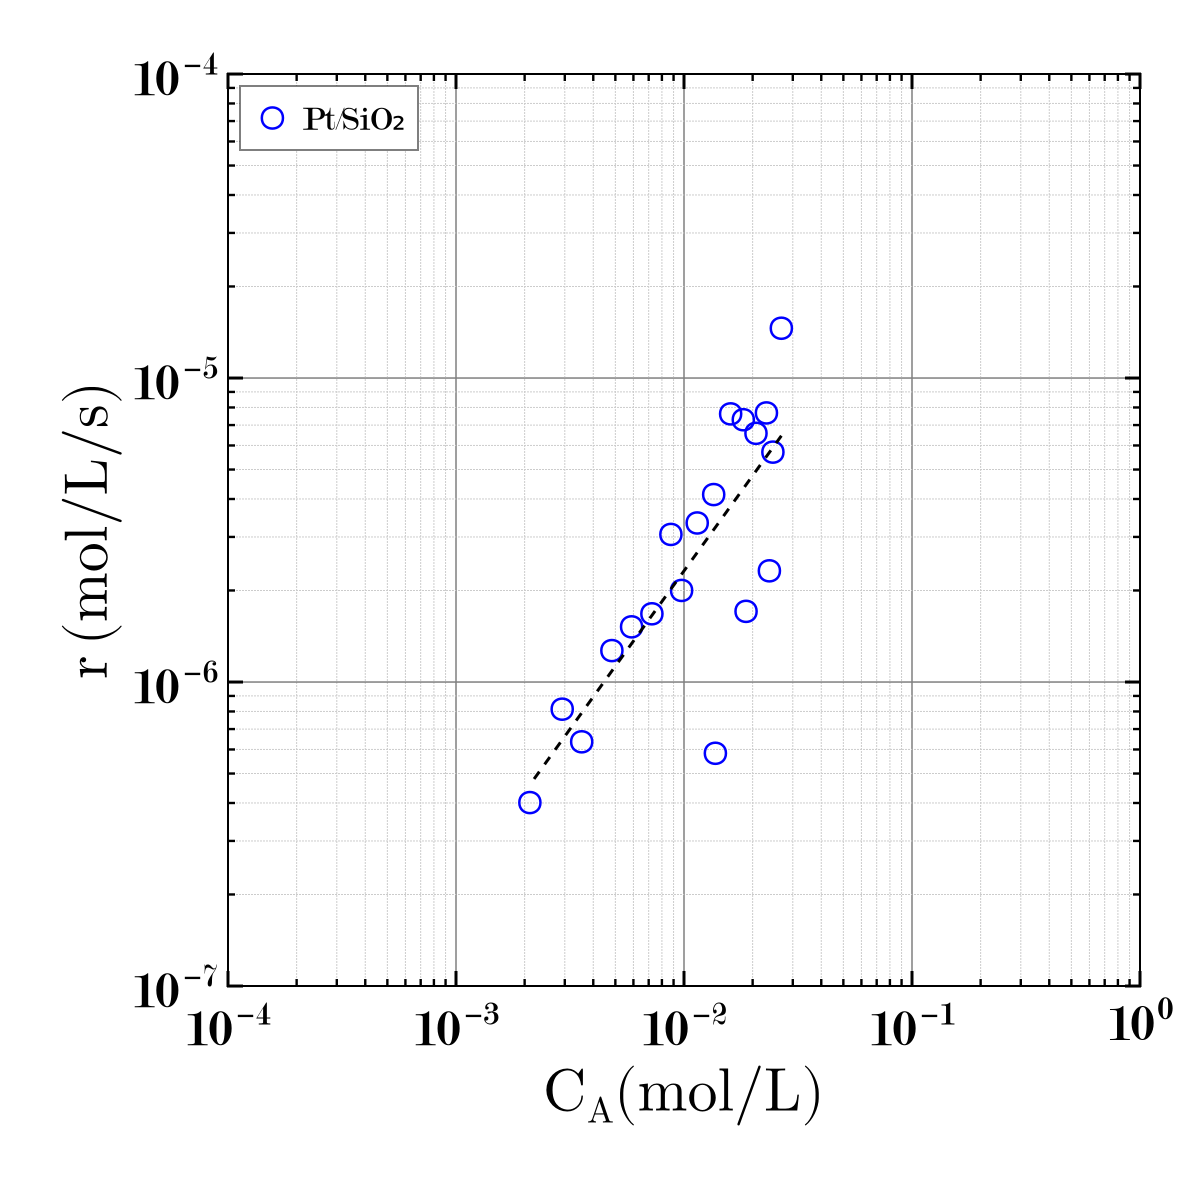

In [12]:
##############################################################################################
# Display results of linear regression and figure for differential analysis                  #
##############################################################################################

@printf("α = %3.2f, and k = %3.2E s⁻¹", f1[1], 10^f1[0])
display(fig2);

## Integral Analysis for a First Order Reaction

Based on that differential analysis result, we are confident that the system has a first order rate of reaction (in species A). To increase precision in our estimation of the rate constant, it is common to fix the reaction order at 1 and solve the differential equation that describes a well-mixed, constant volume batch reactor:

$$\frac{dC_A}{dt} = -kC_A$$

This results in an analytical solution for $C_A(t)$:

$$C_A = C_{A0}\exp{(-kt)}$$

This can be linearized by taking natural logarithms:

$$\ln{(C_A)} = \ln{(C_{A0})} -kt$$

We *could* regress the slope and intercept from a plot of $\ln{(C_A)}$ vs $t$, but it is worth considering that regressing the y-intercept provides an estimate of the initial concentration of species $A$ based on somewhat noisy measurements. In some cases, we may need to do this. But here, we have a well-controlled experiment, and we know $C_{A0}$ with good precision. There is no need to estimate it by regression as (a) we already know its value and (b) regressing the intercept increases uncertainty in the slope (i.e., the rate constant). We improve precision in our estimate of the rate constant by forcing the y-intercept to zero and only regressing the slope:

$$\ln{\left(\frac{C_A}{C_{A0}}\right)} = -kt$$

In [13]:
###############################################################################################
# Linear regression of slope with b = 0                                                       #
###############################################################################################

X2 = t1
Y2 = log.(CA1/CA0)
m2 = transpose(X2)*X2\transpose(X2)*Y2 #Linear regression formula
k2 = -m2
;

In [14]:
##############################################################################################
# This cell generates linearized CA vs time plot                                             #
##############################################################################################

set_theme!(theme_linear)
fig3 = Figure(size = (600, 600))
ax1  = Axis(fig3[1,1])
ax2  = Axis(fig3[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = 0:2:10
ylim_vals  = (-3, 0)
ytick_vals = -3:1:0
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{\ln{\left(C_A/C_{A0}\right)}}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, X2/1000, Y2, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :blue, color = (:white,0.0))
lines!(ax1, X2/1000, X2*m2, label = "First Order Fit", color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(ax1, position = :rt, framevisible = true)

CairoMakie.activate!(type = "svg")

The rate constant for this reaction is 2.81E-04 s⁻¹

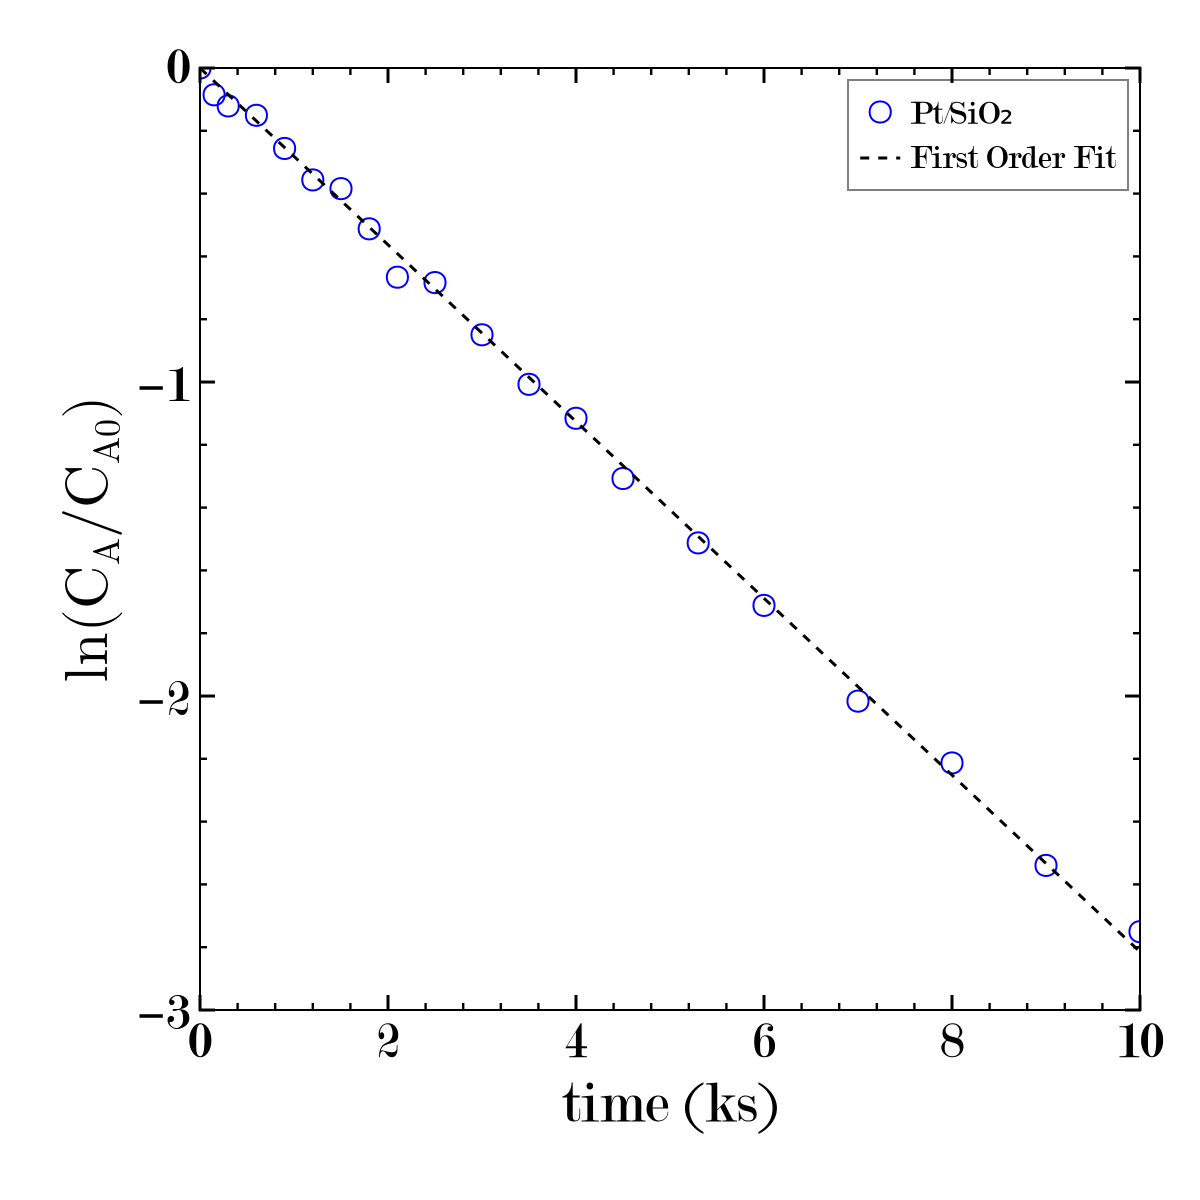

In [15]:
##############################################################################################
# Display results of linear regression and figure for integral analysis                      #
##############################################################################################

@printf("The rate constant for this reaction is %3.2E s⁻¹", k2)
display(fig3)
;

## Applying the Analysis to Multiple Catalysts

We see good fits to the data, we conclude that the reaction is first order over $\mathrm{Pt/SiO_2}$, and we have estimated a rate constant for $\mathrm{Pt/SiO_2}$. This is the gold standard for kinetic analysis! We are naturally excited to benchmark the activity of our other catalysts using this same methodology. This reaction is not known to be structure-sensitive on Pt, but we hypothesize that we can tune the performance of our Pt catalyst by changing the support from $\mathrm{SiO_2}$ to other materials like activated $C$, $\mathrm{\gamma}$-$\mathrm{Al_2O_3}$, $\mathrm{ZrO_2}$, and $\mathrm{TiO_2}$. We accordingly prepare a series of 3 wt% Pt catalysts on these 5 different supports, and we test their activity in this reaction using the same batch reactor described above. ***We will repeat this experiment as is commonly reported in the literature -- we will systematically change only the identity of the catalyst and keep all of our operating parameters constant.***  So, in all cases, we have the same conditions as in the original experiment:

\begin{align}
    T       &= 450.0 \ \mathrm{K} \\
    C_{A0}  &= 0.0267 \ \mathrm{moles \ L^{-1}}\\
    C_{B0}  &= 0 \ \mathrm{moles \ L^{-1}} \\
    m_\mathrm{cat} &= 1 \ \mathrm{g} \\
\end{align}

We again use gas chromatography to obtain the concentration profiles, which are saved in .csv files, loaded in the cell below, and displayed in tabular format and in a figure.

In [17]:
###################################################################
# Load experimental CA vs. t profiles for each catalyst           #
###################################################################

DATA2 = readdlm("BATCH2.csv", ',', Float64, '\n', header = false)
t2  = DATA2[:, 1:5]
CA2 = DATA2[:, 6:10]
XA2 = DATA2[:, 11:15]
NA2 = DATA2[:, 16:20]

pretty_table(hcat(t2[:, 1]/1000, round.(CA2*1000, digits = 1)), 
    header = (["t", "Pt/ZrO₂", "Pt/TiO₂", "Pt/SiO₂", "Pt/C", "Pt/Al₂O₃"], ["(ks)", "(mmol/L)", "(mmol/L)", "(mmol/L)", "(mmol/L)", "(mmol/L)"]),
    header_alignment = ([:c, :c, :c, :c, :c, :c]))
;

┌──────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│  t   │ Pt/ZrO₂  │ Pt/TiO₂  │ Pt/SiO₂  │   Pt/C   │ Pt/Al₂O₃ │
│ (ks) │ (mmol/L) │ (mmol/L) │ (mmol/L) │ (mmol/L) │ (mmol/L) │
├──────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│  0.0 │     26.7 │     26.7 │     26.7 │     26.7 │     26.7 │
│ 0.15 │     26.5 │     26.2 │     25.4 │     24.1 │     19.8 │
│  0.3 │     26.2 │     25.7 │     24.7 │     21.9 │     14.8 │
│  0.6 │     25.7 │     24.8 │     22.6 │     14.8 │      9.3 │
│  0.9 │     25.0 │     23.6 │     20.8 │     13.8 │      5.4 │
│  1.2 │     24.6 │     22.5 │     18.9 │      9.7 │      3.0 │
│  1.5 │     24.0 │     21.7 │     17.7 │      7.4 │      2.0 │
│  1.8 │     23.5 │     20.7 │     16.4 │      5.7 │      1.5 │
│  2.1 │     23.1 │     19.9 │     14.8 │      4.6 │      0.7 │
│  2.5 │     22.4 │     18.9 │     13.1 │      3.0 │      0.4 │
│  3.0 │     21.7 │     17.4 │     11.4 │      2.1 │      0.2 │
│  3.5 │     20.9 │     16.3 │     10.0 

In [18]:
##############################################################################################
# This cell generates CA vs. time profiles  for each catalyst                                #
##############################################################################################

set_theme!(theme_linear)

fig4 = Figure(size = (600, 600))
ax1  = Axis(fig4[1,1])
ax2  = Axis(fig4[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (0, 30)
ytick_vals = collect(0:5:30)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{C_A (mmol \, L^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

labels = ["Pt/ZrO₂", "Pt/TiO₂", "Pt/SiO₂", "Pt/C", "Pt/Al₂O₃"] 

for j = 1:size(t2, 2)
    scatter!(ax1, t2[:, j]/1000, CA2[:, j]*1000, label = labels[j], cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
end
axislegend(ax1, position = :rt, framevisible = true)

CairoMakie.activate!(type = "svg")
;

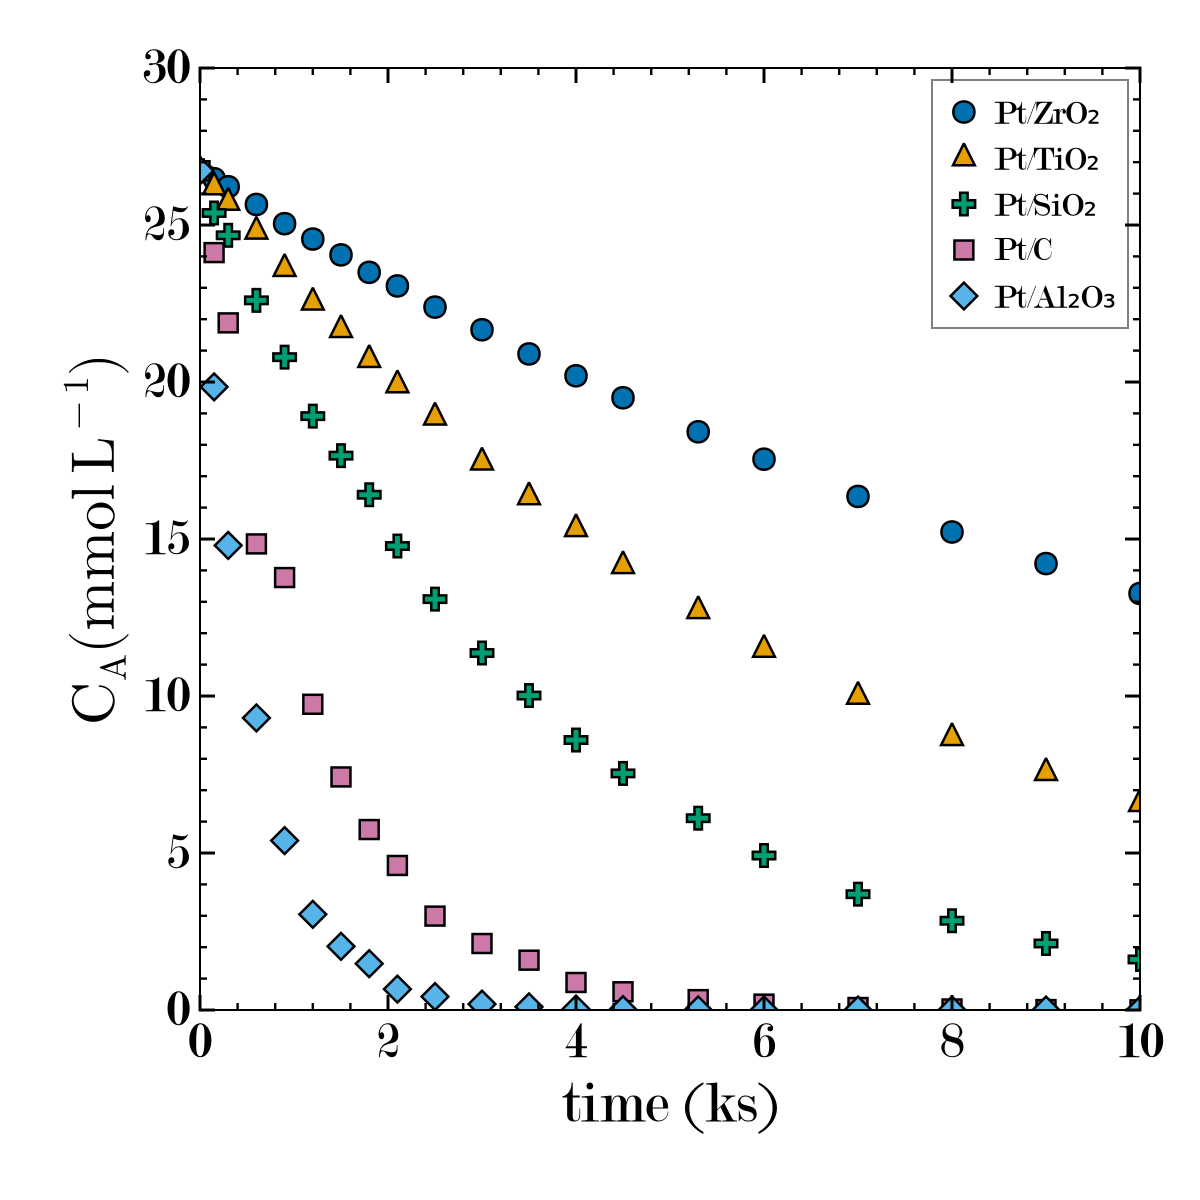

In [19]:
##############################################################################################
# Display CA vs. time profiles for all catalysts                                             #
##############################################################################################

display(fig4);

### A Typical Catalyst Comparison

In the catalysis literature, we often focus on comparisons between catalysts, and we emphasize things like which material was the "most active." One might often see a set of materials in this type of experiment ranked based on how long they take to achieve a certain benchmark conversion, e.g., 50% conversion of the reactant.  We can illustrate this type of comparison in the figure below.

In [20]:
##############################################################################################
# This cell generates XA vs. time profiles  for each catalyst                                #
##############################################################################################

set_theme!(theme_linear)

fig5 = Figure(size = (600, 600))
ax1  = Axis(fig5[1,1])
ax2  = Axis(fig5[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (0, 1)
ytick_vals = collect(0:0.2:1)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{X_A}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

labels = ["Pt/ZrO₂", "Pt/TiO₂", "Pt/SiO₂", "Pt/C", "Pt/Al₂O₃"] 

for j = 1:size(t2, 2)
    scatter!(ax1, t2[:, j]/1000, XA2[:, j], label = labels[j], cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
end
hlines!(ax1, 0.5, 0, 1, linestyle = :dash, color = :red)
axislegend(ax1, position = :rb, framevisible = true)

CairoMakie.activate!(type = "svg")
;

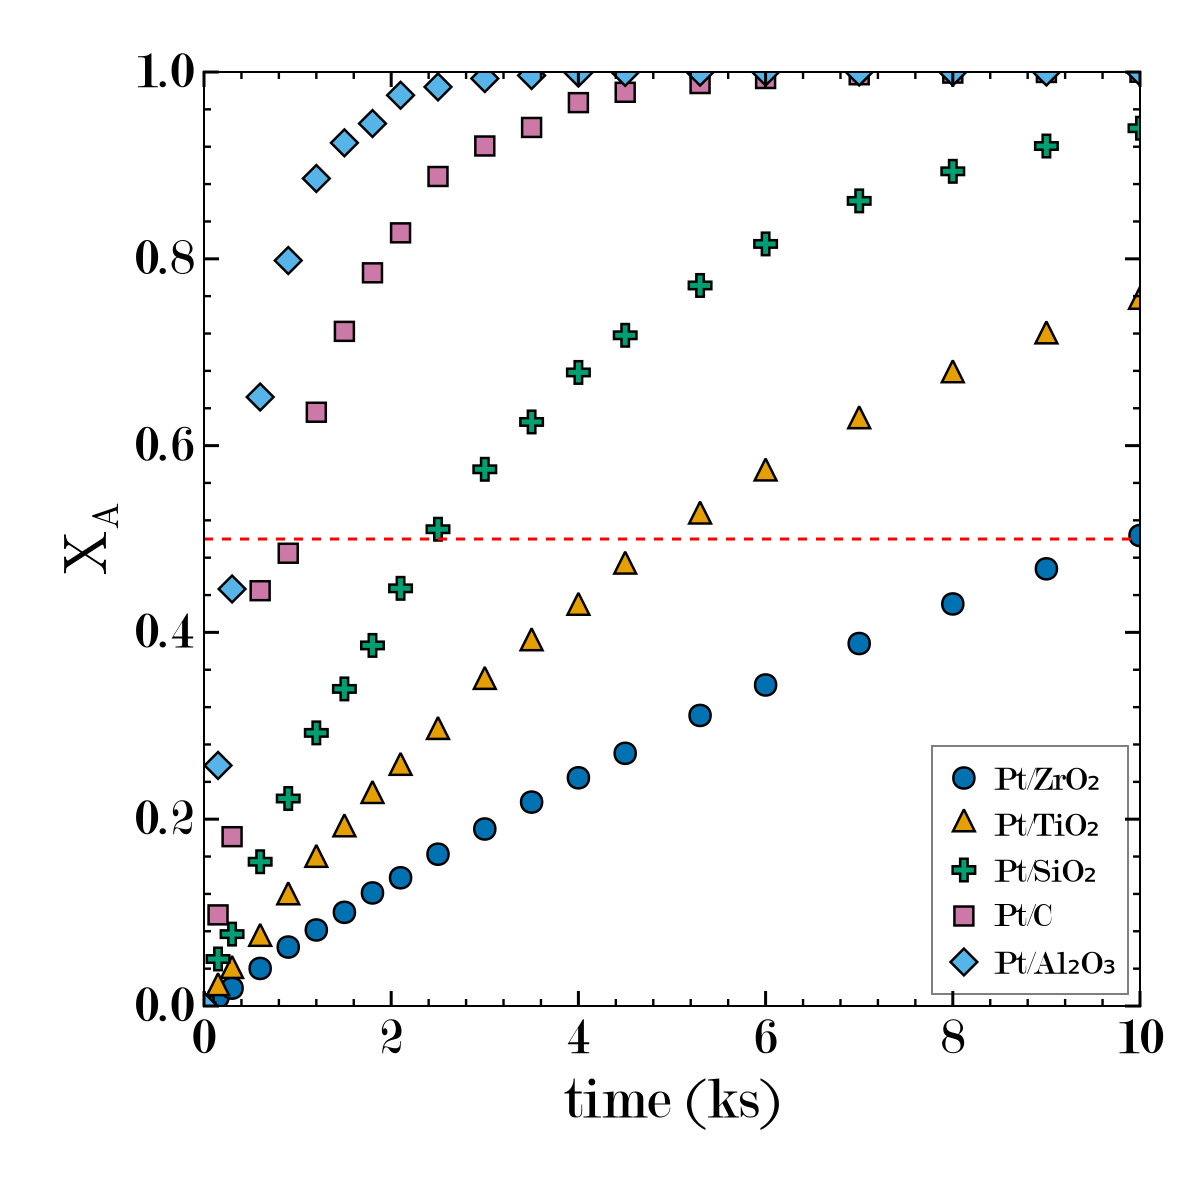

In [21]:
###############################################################
# Display XA vs. time figure                                  #
###############################################################

display(fig5);

### Applying the differential and integral analysis to each catalyst

Because we have $C_A$ vs. $t$ data for each catalyst, we can go through the typical differential and integral methods for analysis of batch reactor data. This permits one to estimate reaction orders and rate constants.

In [22]:
#########################################################################################
# This cell uses finite differences to estimate reaction rates vs. CA for each catalyst #
#########################################################################################

dt3 = diff(t2, dims = 1)
dC3 = diff(CA2, dims = 1)
r3  = -1*dC3./dt3
Y3  = log10.(r3)
X3  = log10.(CA2[1:end-1, :])

#########################################################################################
# Regress slope (order) and intecept (ln(k)) for each catalyst; store in dictionary     #
#########################################################################################

f3 = Dict()
for j = 1:size(r3, 2)
    f3[j]  = fit(X3[:, j], Y3[:, j], 1)
end
;

In [23]:
##############################################################################################
# This cell generates log-log plots of rate vs CA for each catalyst for assessment of orders #
##############################################################################################

set_theme!(theme_log)
fig6 = Figure(size = (600, 600))
ax1  = Axis(fig6[1,1])
ax2  = Axis(fig6[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (1e-3, 1e-1)
#xtick_vals = [0.001, 0.01, 0.1]
ylim_vals  = (1e-7, 1e-4)
#ytick_vals = [0.01, 0.1, 1, 10, 100]
xscale_val = log10
yscale_val = log10

ax1.xlabel = L"\mathrm{C_A (mol/L)}"
ax1.ylabel = L"\mathrm{r \,(mol/L/s)}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

# ax1.xticks = xtick_vals
# ax2.xticks = xtick_vals

# ax1.yticks = ytick_vals
# ax2.yticks = ytick_vals

labels = ["Pt/ZrO₂", "Pt/TiO₂", "Pt/SiO₂", "Pt/C", "Pt/Al₂O₃"] 

for j = 1:5
    scatter!(ax1, 10 .^X3[:, j], r3[:, j], label = labels[j], cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
    lines!(ax1, 10 .^X3[:, j], 10 .^f3[j].(X3[:, j]), color = :black, linestyle = :dash, linewidth = 1.5)
end
axislegend(ax1, position = :lt, framevisible = true);

For  Pt/ZrO₂, α = 1.04 and k = 7.94E-05 s⁻¹ 
For  Pt/TiO₂, α = 1.03 and k = 1.52E-04 s⁻¹ 
For  Pt/SiO₂, α = 1.04 and k = 3.11E-04 s⁻¹ 
For     Pt/C, α = 1.03 and k = 7.57E-04 s⁻¹ 
For Pt/Al₂O₃, α = 1.04 and k = 1.66E-03 s⁻¹ 


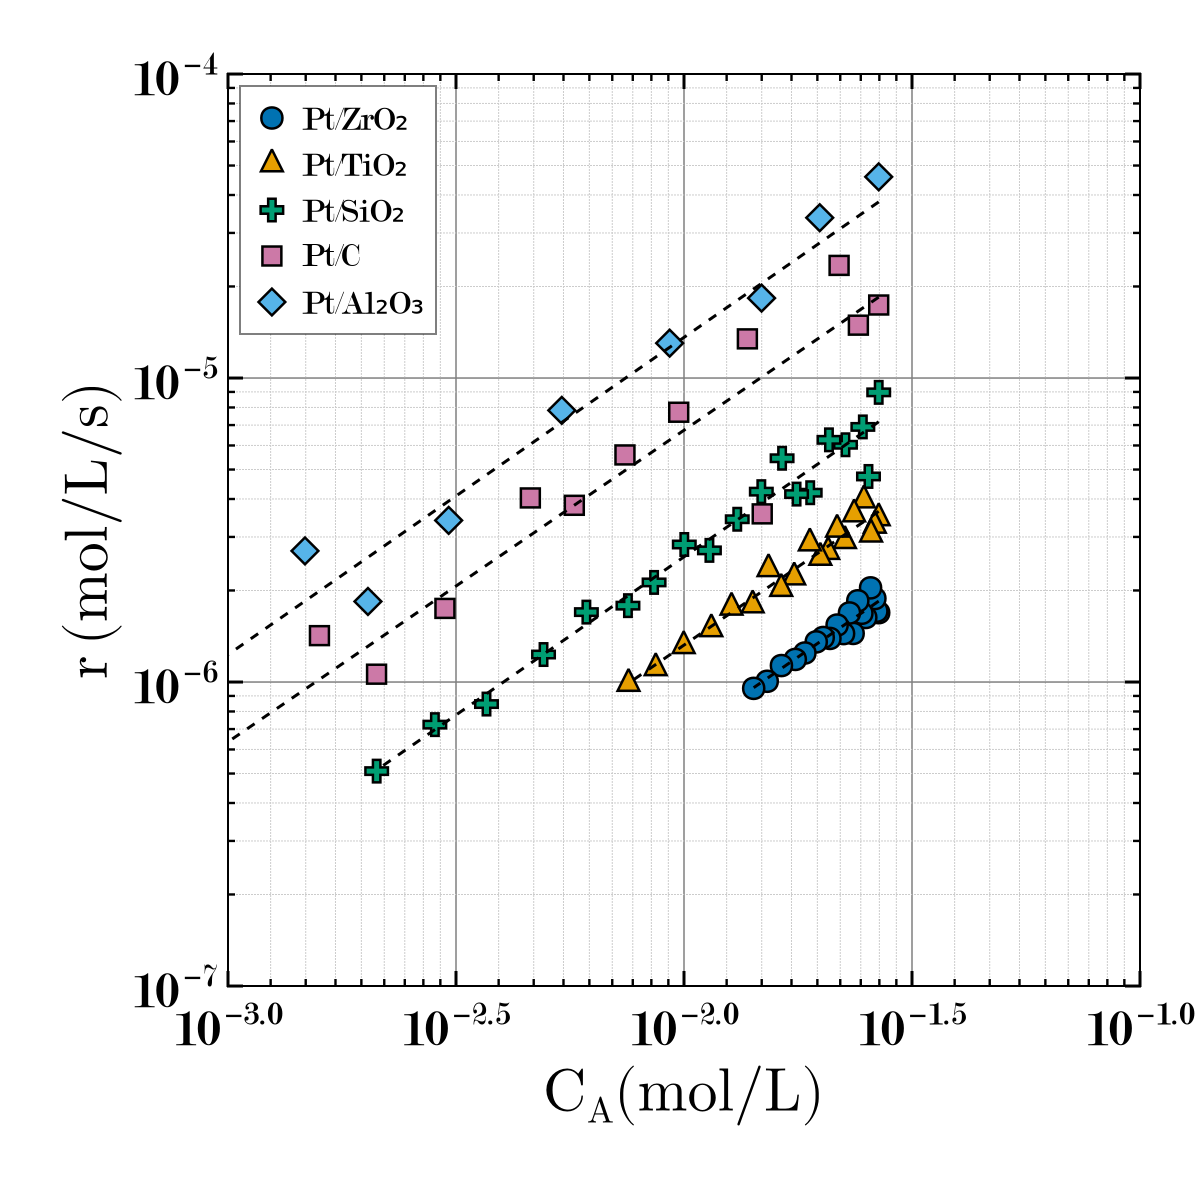

In [24]:
##############################################################################################
# Display regression results and figure                                                      #
##############################################################################################

for j = 1:size(t2, 2)
    @printf("For %8s, α = %3.2f and k = %3.2E s⁻¹ \n", labels[j], f3[j][1], 10^f3[j][0])
end
display(fig6);

In [25]:
### Applying the integral analysis for first order kinetics to each catalyst

mset = zeros(size(t2, 2))
X4   = t2
Y4   = log.(CA2/CA0)
    
for j = 1:length(mset)    
    mset[j] = transpose(X4[:, j])*X4[:, j]\transpose(X4[:, j])*Y4[:, j] #Linear regression formula
end

kset = mset
;

In [26]:
##############################################################################################
# This cell generates linearized CA vs time profiles for each catalyst                       #
##############################################################################################

set_theme!(theme_linear)
fig7 = Figure(size = (600, 600))
ax1  = Axis(fig7[1,1])
ax2  = Axis(fig7[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (-3, 0)
ytick_vals = collect(-3:1:0)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{\ln{\left(C_A/C_{A0}\right)}}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

labels = ["Pt/ZrO₂", "Pt/TiO₂", "Pt/SiO₂", "Pt/C", "Pt/Al₂O₃"] 
for j = 1:5
    scatter!(ax1, X4[:, j]/1000, Y4[:, j], label = labels[j], cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
    lines!(ax1, X4[:, j]/1000, mset[j]*X4[:, j], color = :black, linestyle = :dash, linewidth = 1.5)
end

CairoMakie.activate!(type = "svg")

For  Pt/ZrO₂, k = 7.02E-05 s⁻¹ 
For  Pt/TiO₂, k = 1.41E-04 s⁻¹ 
For  Pt/SiO₂, k = 2.81E-04 s⁻¹ 
For     Pt/C, k = 8.40E-04 s⁻¹ 
For Pt/Al₂O₃, k = 1.69E-03 s⁻¹ 


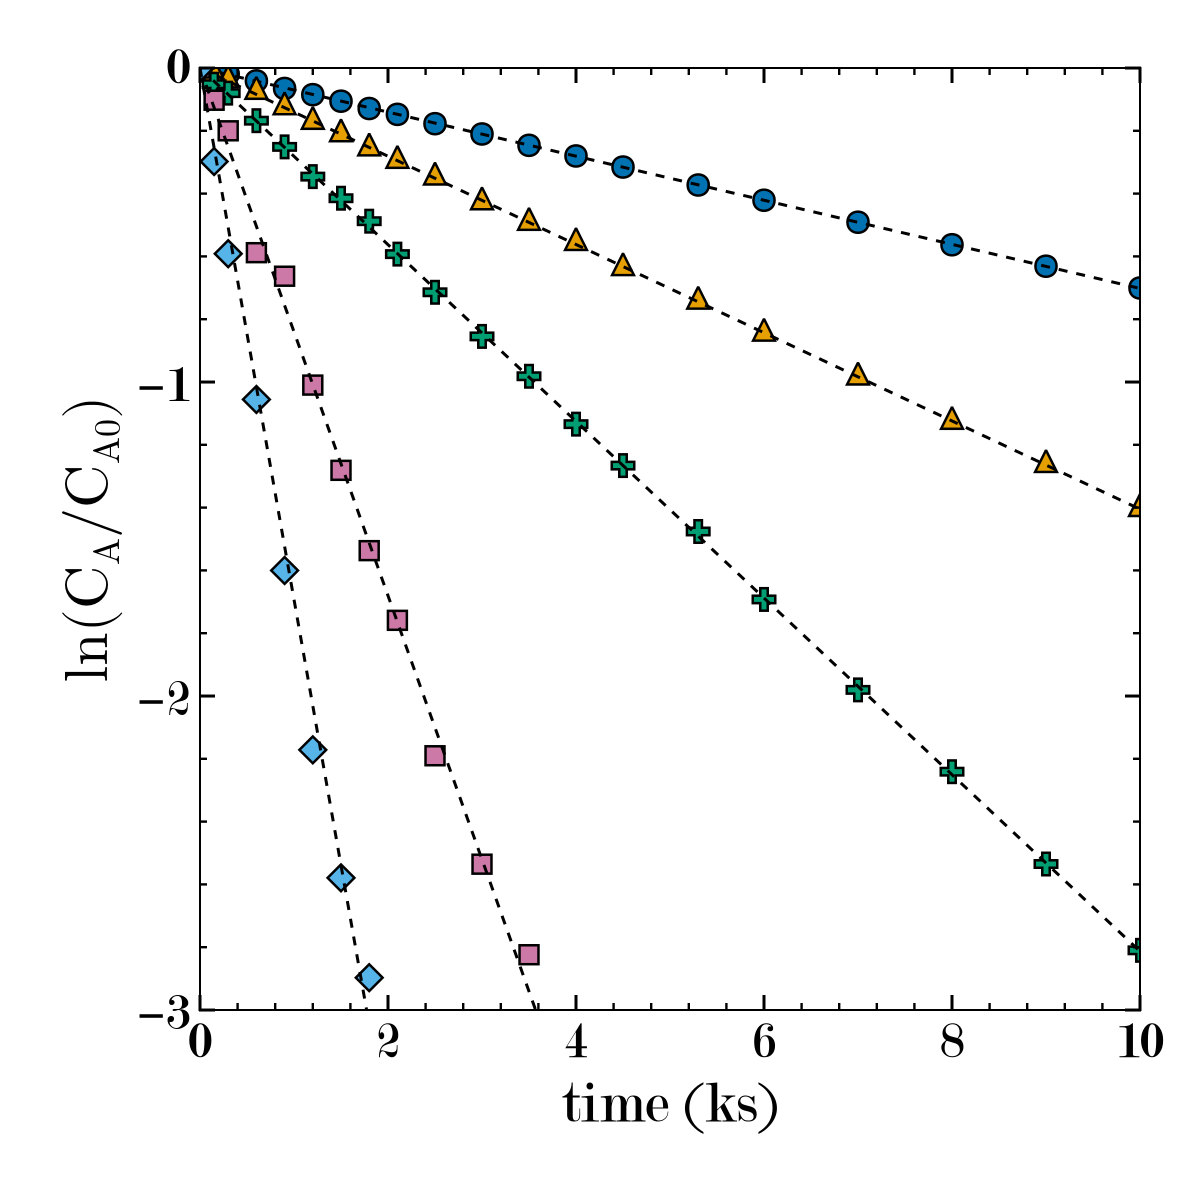

In [27]:
##############################################################################################
# Display regression results and figure                                                      #
##############################################################################################

for j = 1:size(t2, 2)
    @printf("For %8s, k = %3.2E s⁻¹ \n", labels[j], -1*mset[j])
end
display(fig7);

### Let's get at those barriers!

So far, everything suggests that all of these catalysts show first order kinetics and that activity, as indicated by the rate constant, increases considerably from Catalyst 1 to Catalyst 5.  That's two orders of magnitude, which we generally take as pretty significant, and so we might next set about trying to figure out why Catalyst 5 is so much more active than Catalyst 1.

In our coursework, we hammer on Arrhenius plots pretty heavily.  We now have a good way to determine rate constants from an integral analysis, and we know all of the systems here show fist order kinetcs, so we repeat our experiments at multiple temperatures and use that analysis at each one to estimate rate constants.  With this information, we can generate an Arrhenius plot that will allow us to estimate barriers and pre-exponential factors.

Specifically, we repeat the experiment using the identical system described above, but we perform the experiments at six temperatures:

```julia
Tset = [400, 425, 450, 475, 500, 525] #Kelvin
```

In [28]:
#####################################################################################
# Load data obtained at various temperatures in the above-described batch reactor   #
#####################################################################################

BATCHT = load_object("BATCHT");

### Linearization of k vs. T

The scripts below simply apply our integral analysis to each temperature data set to extract rate constants for each catalyst as a function of reaction temperature. These are then used to generate an Arrhenius plot.  Generally, this analytical framework comes from the Arrhenius expression:

$$k = A\exp{\left(-\frac{E_A}{RT}\right)}$$

This is linearized by a logarithmic transformation:

$$\ln{(k)} = \ln{(A)} - \frac{E_A}{R}\frac{1}{T}$$

In [29]:
##########################################################################################
# This cell performs integral analysis for all data on each catalyst at each temperature #
# This estimates a rate constant for each catalyst at each temperature                   #
# Rate constants estimated this way are then graphed in a conventional Arrhenius plot    #
##########################################################################################

Tset = [400, 425, 450, 475, 500, 525]
kset = zeros(size(t2, 2), length(Tset))
f5 = Dict()

# Estimate rate constants from linearization for first order kinetics
for j = 1:length(Tset)
    DATA = BATCHT[string(Tset[j])]
    t  = DATA[:, 1:5]
    CA = DATA[:, 6:10]
    X  = t
    Y  = log.(CA/CA[1, 1])
    for i = 1:size(kset, 1)    
        kset[i, j] = -1*transpose(X[:, i])*X[:, i]\transpose(X[:, i])*Y[:, i] #Linear regression formula
    end
end

# Arrhenius Linearization
X5   = 1000 ./Tset
Y5   = log.(kset)

# Linear regression of Arrhenius data
for i = 1:size(kset, 1)    
    f5[i] = fit(X5, Y5[i, :], 1)
end

In [30]:
##########################################################################################
# Generate the Arrhenius plot                                                            #
##########################################################################################

set_theme!(theme_linear)
fig8 = Figure(size = (600, 600))
ax1  = Axis(fig8[1,1])
ax2  = Axis(fig8[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (1.75, 2.75)
xtick_vals = collect(1.75:0.25:2.75)
ylim_vals  = (-14, -2)
ytick_vals = collect(-14:2:-2)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "1000/K (K⁻¹)"
ax1.ylabel = L"\mathrm{\ln{\left(k\right)}}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

labels = ["Pt/ZrO₂", "Pt/TiO₂", "Pt/SiO₂", "Pt/C", "Pt/Al₂O₃"] 
for j = 1:size(kset, 1)
    scatter!(ax1, 1000 ./Tset, log.(kset[j, :]), label = labels[j], cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
    lines!(ax1, 1000 ./Tset, f5[j].(X5), color = :black, linestyle = :dash, linewidth = 1.5)
end

CairoMakie.activate!(type = "svg")
;

For  Pt/ZrO₂, A = 2.41E+06 s⁻¹ and EA = 90.74 kJ/mol 
For  Pt/TiO₂, A = 5.50E+06 s⁻¹ and EA = 91.22 kJ/mol 
For  Pt/SiO₂, A = 1.53E+07 s⁻¹ and EA = 92.38 kJ/mol 
For     Pt/C, A = 5.45E+07 s⁻¹ and EA = 92.93 kJ/mol 
For Pt/Al₂O₃, A = 1.38E+08 s⁻¹ and EA = 93.79 kJ/mol 


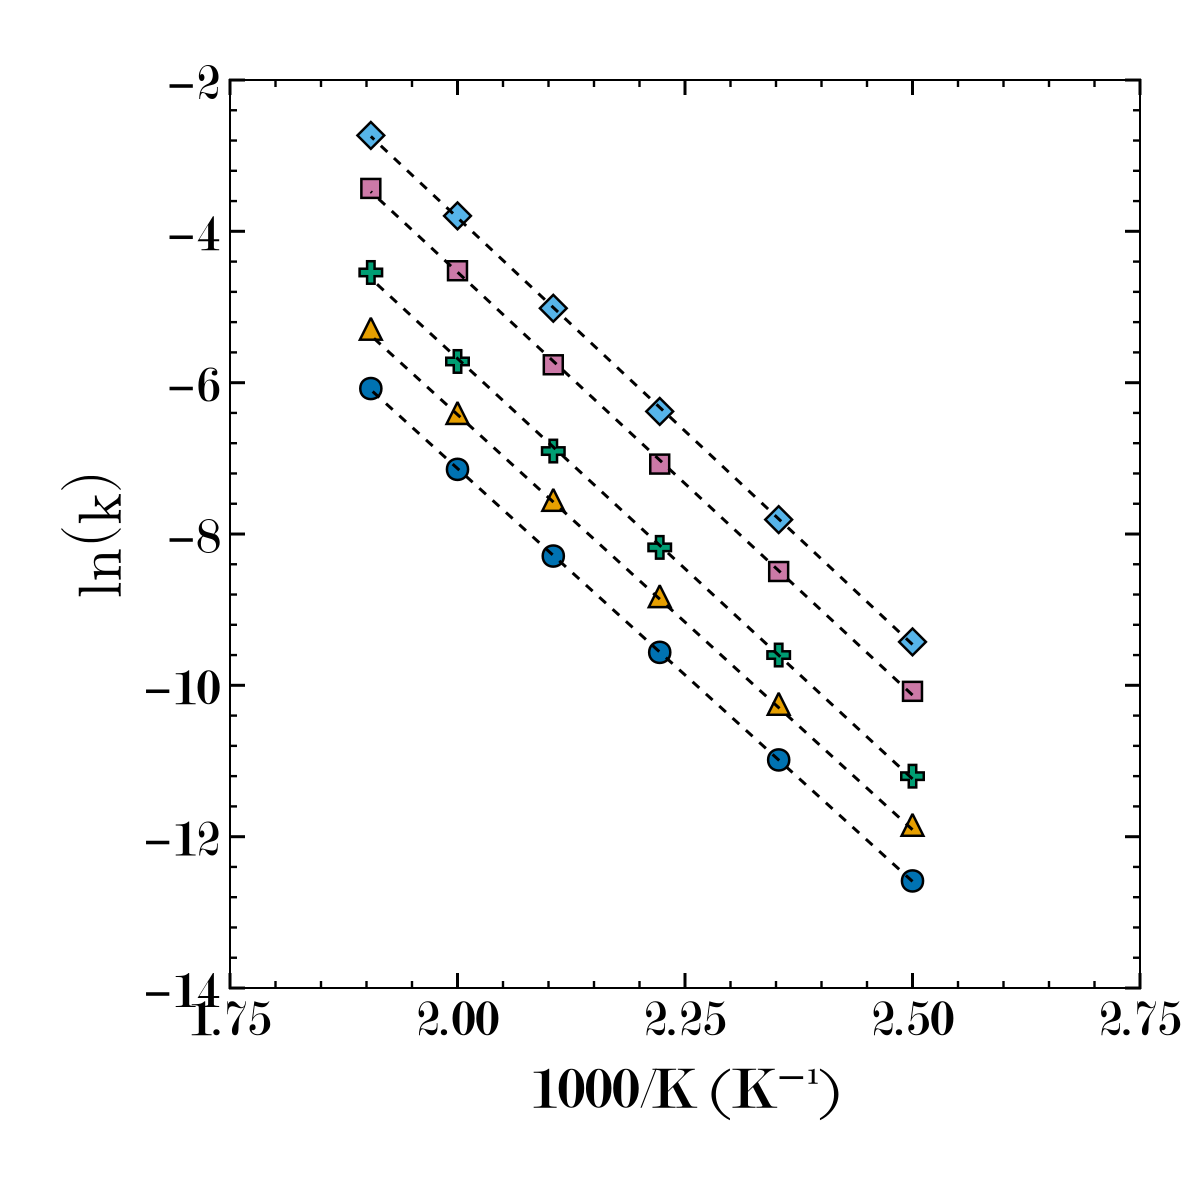

In [31]:
##########################################################################################
# Display regression results and Arrhenius plot                                          #
##########################################################################################

for j = 1:size(kset, 1)
    @printf("For %8s, A = %3.2E s⁻¹ and EA = %3.2f kJ/mol \n", labels[j], exp(f5[j][0]), -8.314*f5[j][1])
end
display(fig8)
;

## Interpreting our parameter estimates

We find that the barriers for each catalyst are identical, and that the entire variation in performance seems to come from different pre-exponential factors. At this point in the analysis, we would probably recall from our courses in kinetics and physical chemistry that the pre-exponential factor is generally a function of the entropy of activation for a reaction. We might then seek explanations for why the Pt/Al2O3 catalysts has a more favorable entropy of activation than the other materials. We might also be curious about why the entropy of activation is such a strong function of catalyst support. This is a logical course of analysis, but it unfortunately has all been based on a faulty assumption that the differential equation below:

$$\frac{dC_A}{dt} = R_A$$

Provides a sensible fundamental description of this batch reactor. The balance is not incorrect, per se. Our analysis does adequately reflect the volumetric reaction rate, which is clearly best on the $\mathrm{Pt/Al_2O_3}$ catalyst. This is likely the one we would choose to use in industrial practice as it offers the highest conversion in the shortest time, which generally means less expensive capital and reactor operation. But if we are interested in a more fundamental description of the differences between the various catalysts, we need to consider variations in metal loading and/or dispersion, which leads to variations in the number of exposed active sites. This certainly would impact our observations in a batch reactor, but it is missing from the material balance that we applied for analysis. When we perform the analysis as above, variations in the active site quantity will show up in our pre-exponential. This is why, for a family of related catalysts, we commonly see similar barriers but different y-intercepts (pre-exponentials) in an Arrhenius plot. Whenever one observes identical slopes but varied y-intercepts in an Arrhenius plot, this is a telltale sign of dispersion effects, variations in loading of the active phase, or a combination of the two. It is rare to observe identical barriers (enthalpies of activation) and widely varying pre-exponential factors (entropies of activation), so when this result appears, we should ask whether we have correctly accounted for variations in the quantity of active sites. 

## A better analysis for heterogeneously catalyzed reactions

If we aim to resolve fundamental differences in the materials, then we need a better description of system dynamics. It is important to remember that the material balance on a constant volume batch reactor that we invoked above is a ***special case of the general material balance***. It does not apply under all conditions, and a more useful analysis in a catalytic system requires us to general material balance, which is extensive in nature:

$$\frac{dN_A}{dt} = G_A$$

Where we note that the dimensions are moles per time, and the generation term on the right hand side should be considered an extensive metric that quantifies the total rate of generation or consumption of species A within the entire batch reactor, not per unit volume of batch reactor. To get this quantity, we typically scale an intensive reaction or production rate to the size of the system. For a homogeneous reaction, it is convenient for us to define intensive reaction and production rates per unit volume of catalyst, so we would write the following definition for the extensive rate of generation, which scales a volume normalized production rate, $R_A$, to the total volume of the perfectly-mixed system:

$$\frac{dN_A}{dt} = R_AV$$

For a heterogeneously catalyzed reaction, extensive production rates do not scale with system volume. Rather, they scale with the quantity of catalyst inside the reactor. More specifically, they scale with the number of active sites inside of the reactor. In our experiment, we controlled the mass of catalyst (1 gram), but we did not necessarily control the number of active sites. Effectively, then, we are comparing various reactors of different sizes, which leads to a confusing analysis.  A better approach is to define the extensive production rate of species A in terms of a turnover frequency (rate per active site) and the number of active sites in the bed.

### Balance for a heterogenously catalyzed reaction

$$\frac{dN_A}{dt} = G_A$$

$$\frac{dN_A}{dt} = {R_A}^{\prime \prime \prime}N_S$$

To keep units of the first order rate constant in inverse time, I will define a reaction rate using thermodynamic activities in lieu of concentrations. These will generate analogous insights, but the rate constant will have more complex units if we use concentrations.

$$\frac{dN_A}{dt} = -ka_AN_S$$

And we would define the thermodynamic activity in terms of fugacities/partial pressures.

$$\frac{dN_A}{dt} = -k\frac{N_A}{N_T}\frac{P}{P^\circ}N_{S}$$

For this system, we can say that the total moles in the reactor and the number of active sites are constant. This gives the following analytical solution:

$$\ln{\left(\frac{N_A}{N_{A0}}\right)} = -k \frac{P}{P^\circ} \frac{N_{S0}}{N_{T0}}t$$

Alternatively:

$$\frac{P^\circ}{P}\frac{N_{T0}}{N_{S0}}\ln{\left(\frac{N_A}{N_{A0}}\right)} = -kt$$

We can use this form to estimate a more fundamentally sound rate constant for each material. We then can imagine performing analogous experiments and analysis at various temperatures, allowing us to generate barriers and pre-exponentials that more directly map to entropies and enthalpies of activation (i.e., we have corrected for variations in active sites, so metal dispersion does not appear in the pre-exponential).

In [33]:
######################################################################
# Adding information about the active site density for each catalyst #
######################################################################

NA0    = 10 #moles
NB0    = 0  #moles
NT0    = NA0 + NB0
ρset   = [0.25, 0.5, 1, 3, 6]*1e-3 #active sit density for each catalyst, mol/g
Nset   = 1.0*ρset #Total active sites in the batch reactor, mcat*ρ
;

In [34]:
############################################################################
# Linearization of integral analysis for all data with appropriate scaling #
############################################################################

set_theme!(theme_linear)

fig9 = Figure(size = (600, 600))
ax1  = Axis(fig9[1,1])
ax2  = Axis(fig9[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (-3, 0)
ytick_vals = collect(-3:0.5:0)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "time (ks)"
ax1.ylabel = L"\mathrm{\left(P_{0}/P\right)\left(N_{T0}/N_{S0}\right)}\cdot\ln{\left(\mathrm{N_A/N_{A0}}\right) \times 10^{-4}}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

labels = ["Pt/ZrO₂", "Pt/TiO₂", "Pt/SiO₂", "Pt/C", "Pt/Al₂O₃"] 
for j = 1:size(t2, 2)
    scatter!(ax1, t2[:, j]/1000, NT0/Nset[j]*log.(NA2[:, j]/NA2[1,j])/10000, label = labels[j], cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
end
axislegend(ax1, position = :rt, framevisible = true)

CairoMakie.activate!(type = "svg")

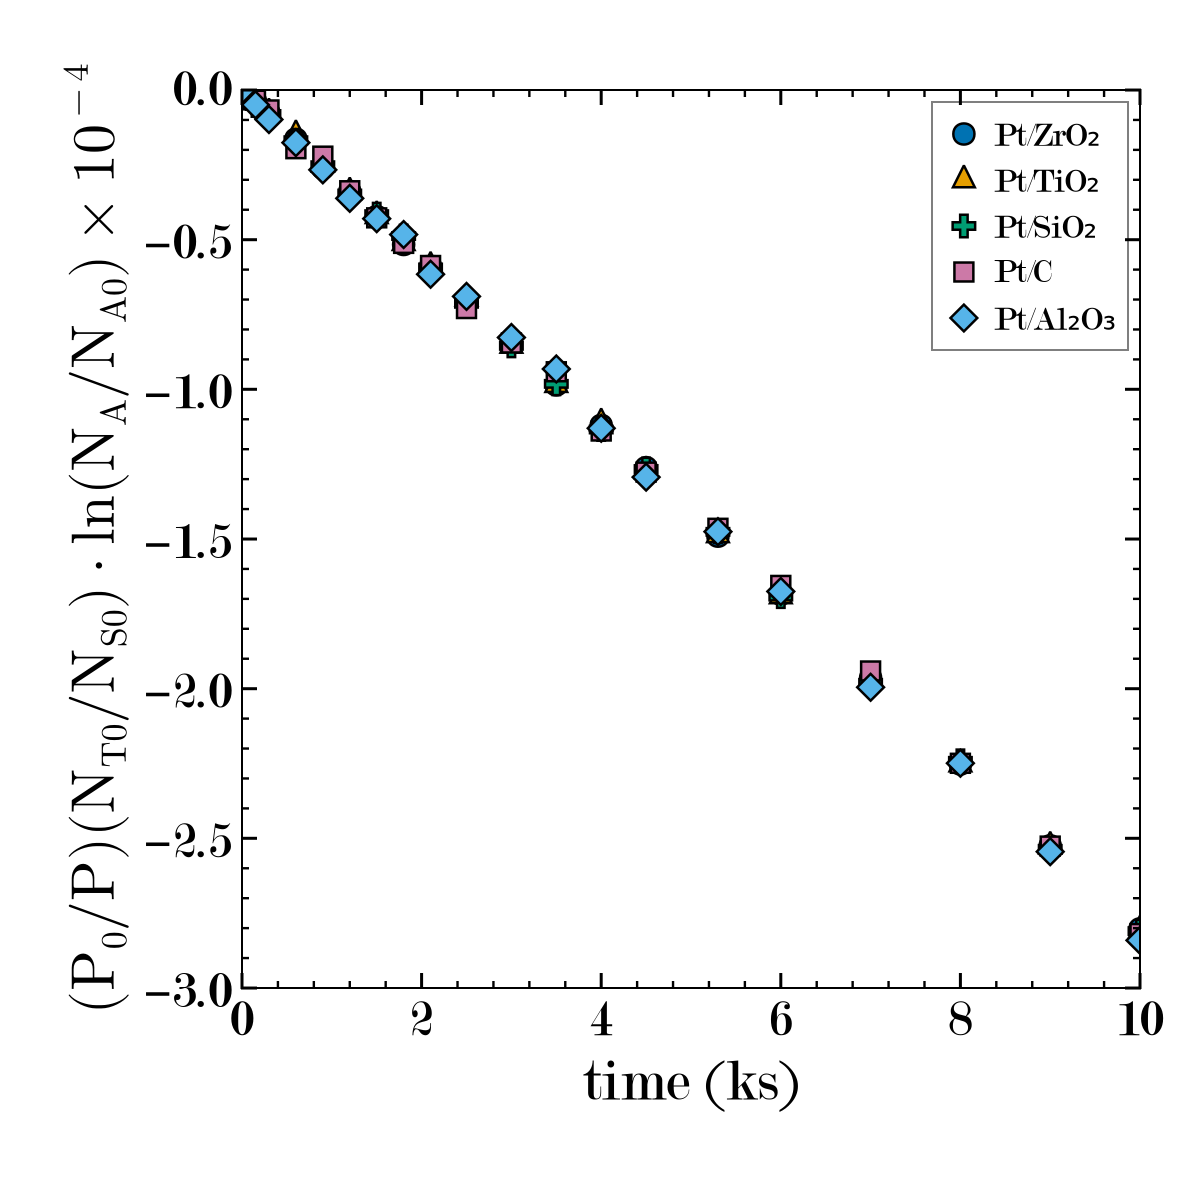

CairoMakie.Screen{IMAGE}


In [35]:
######################################################################
# Display linearization for integral analysis with appropriate scale #
######################################################################

display(fig9)

### Parameter estimation

We can see pretty clearly that with a better description of the system, where kinetics are quantified per unit active site, we estimate similar rate constants for all catalysts. We then repeat the analysis for various temperatures, permitting us to estimate barriers and pre-exponential factors.

In [34]:
####################################################################
# This cell repeats estimation of rate constants and then barriers #
####################################################################

Tset = [400, 425, 450, 475, 500, 525]
kset2 = zeros(size(t2, 2), length(Tset))
f6 = Dict()

for j = 1:length(Tset)
    DATA = BATCHT[string(Tset[j])]
    t  = DATA[:, 1:5]
    NA = DATA[:, 16:20]
    X  = t
    for i = 1:size(kset, 1)
        Y  = log.(NA[:, i]/NA[1, i])*NT0/Nset[i]
        kset[i, j] = -1*transpose(X[:, i])*X[:, i]\transpose(X[:, i])*Y #Linear regression formula
    end
end

X6   = 1000 ./Tset
Y6   = log.(kset)
    
for i = 1:size(kset, 1)    
    f6[i] = fit(X6, Y6[i, :], 1)
end

In [35]:
#####################################################################################
# Generate Arrhenius plot using more fundamentally sound estimate of rate constants #
#####################################################################################

set_theme!(theme_linear)
fig10 = Figure(size = (600, 600))
ax1  = Axis(fig10[1,1])
ax2  = Axis(fig10[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (1.75, 2.75)
xtick_vals = collect(1.75:0.25:2.75)
ylim_vals  = (-3, 5)
ytick_vals = collect(-3:2:5)
xscale_val = identity
yscale_val = identity

ax1.xlabel = "1000/K (K⁻¹)"
ax1.ylabel = L"\mathrm{\ln{\left(k\right)}}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

labels = ["Pt/ZrO₂", "Pt/TiO₂", "Pt/SiO₂", "Pt/C", "Pt/Al₂O₃"] 
for j = 1:size(kset, 1)
    scatter!(ax1, 1000 ./Tset, log.(kset[j, :]), label = labels[j], cycle = Cycle([:color, :marker], covary=true), markersize = 15, strokewidth = 1.25)
#     lines!(ax1, X4[:, j]/1000, mset[j]*X4[:, j], color = :black, linestyle = :dash, linewidth = 1.5)
end

CairoMakie.activate!(type = "svg")
;

For  Pt/ZrO₂, A = 9.63E+10 s⁻¹ and EA = 90.74 kJ/mol 
For  Pt/TiO₂, A = 1.10E+11 s⁻¹ and EA = 91.22 kJ/mol 
For  Pt/SiO₂, A = 1.53E+11 s⁻¹ and EA = 92.38 kJ/mol 
For     Pt/C, A = 1.82E+11 s⁻¹ and EA = 92.93 kJ/mol 
For Pt/Al₂O₃, A = 2.30E+11 s⁻¹ and EA = 93.79 kJ/mol 


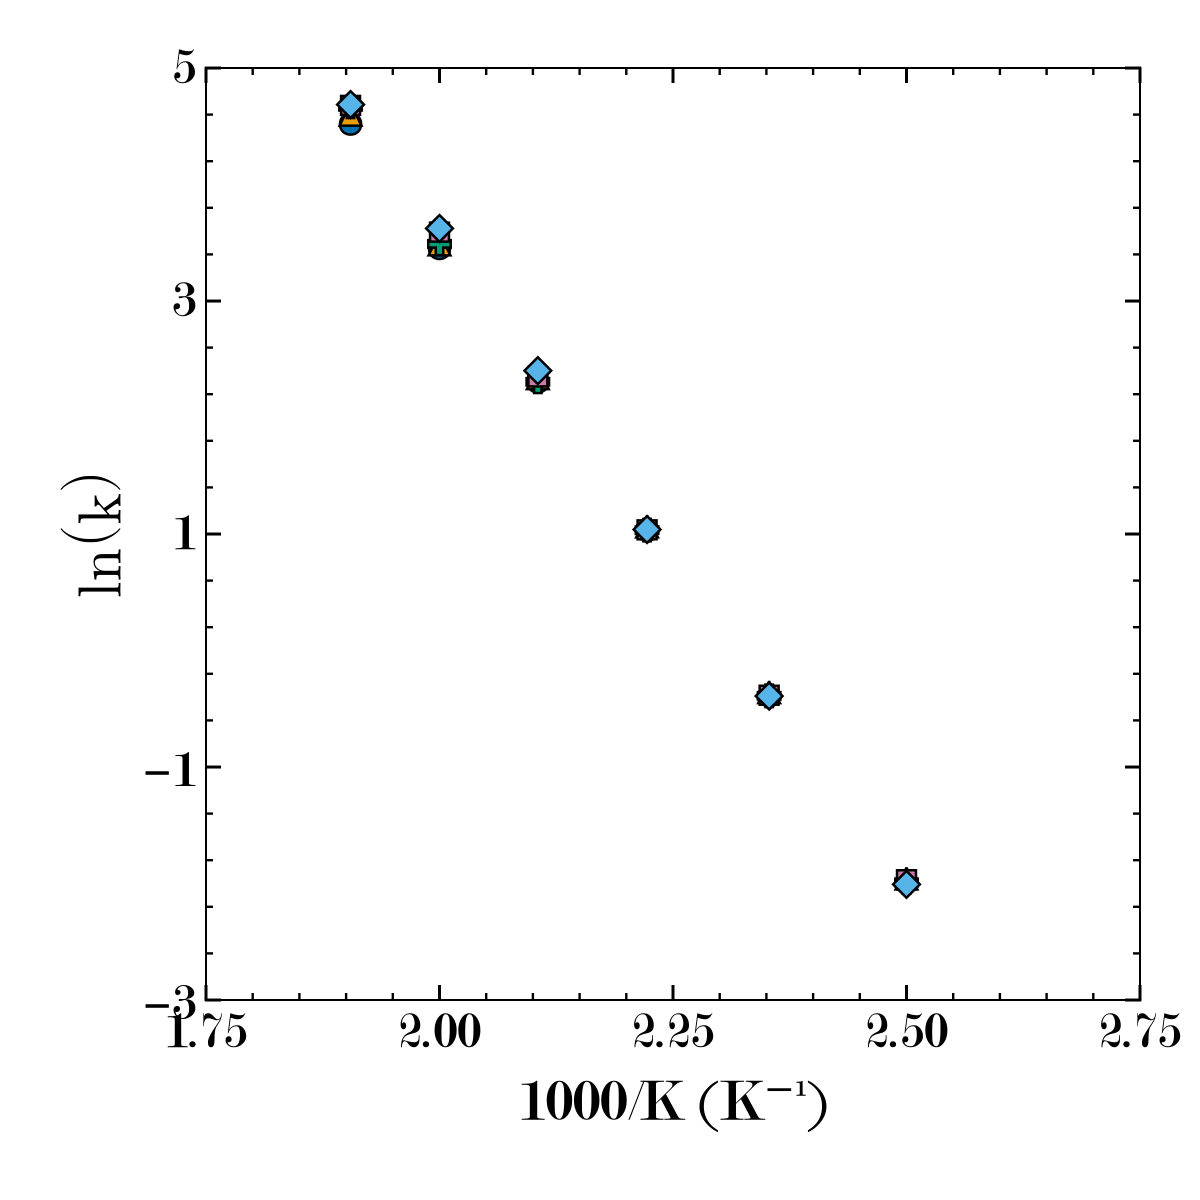

In [36]:
#####################################################################################
# Display regression results and Arrhenius plot                                     #
#####################################################################################

for j = 1:size(kset, 1)
    @printf("For %8s, A = %3.2E s⁻¹ and EA = %3.2f kJ/mol \n", labels[j], exp(f6[j][0]), -8.314*f6[j][1])
end

display(fig10);